ERNEST BRAIMOH REAL DATA AI ML PROJECT

Background:

We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. From operational standpoint we have been facing several different challenges and everyday we are trying to address these challenges.

We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

IMPORT PACKAGES AND INITIATING TIMING OF THE WHOLE PROCESS

In [43]:
import time
start_run = time.time()
import numpy as np
import pandas as pd
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics

#from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

#for models
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression, Perceptron#PassiveAggressiveClassifier,
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import ExtraTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, RidgeClassifierCV

from sklearn.preprocessing import StandardScaler

# feature selection
from sklearn.feature_selection import SelectFromModel
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

IMPORT THE DATA

In [2]:
# Load data from a csv file
data = pd.read_csv('ACME-HappinessSurvey2020.csv')
df = pd.DataFrame(data)

DATA PREPARATION AND PREPROCESSING BEGINS

In [3]:
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


DEFINE THE DATA INPUTS

Here is the meaning of each variable in the data:

Y = target attribute with values indicating 0 (unhappy) and 1 (happy) customers

X1 = my order was delivered on time

X2 = contents of my order was as I expected

X3 = I ordered everything I wanted to order

X4 = I paid a good price for my order

X5 = I am satisfied with my courier

X6 = the app makes ordering easy for me
###Attributes X1 to X6 indicate the responses for each question and have values
###from 1 to 5, where the smaller number indicates less and the higher number
###indicates more towards the answer

DATA CLEANING

In [4]:
#Checking column types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB
None


In [5]:
print(df.shape)  # Print the shape of the DataFrame (number of rows, number of columns)
print(df.describe())  # Statistical summary of the numerical columns of the dataset

(126, 7)
                Y          X1          X2          X3          X4          X5  \
count  126.000000  126.000000  126.000000  126.000000  126.000000  126.000000   
mean     0.547619    4.333333    2.531746    3.309524    3.746032    3.650794   
std      0.499714    0.800000    1.114892    1.023440    0.875776    1.147641   
min      0.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      0.000000    4.000000    2.000000    3.000000    3.000000    3.000000   
50%      1.000000    5.000000    3.000000    3.000000    4.000000    4.000000   
75%      1.000000    5.000000    3.000000    4.000000    4.000000    4.000000   
max      1.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

               X6  
count  126.000000  
mean     4.253968  
std      0.809311  
min      1.000000  
25%      4.000000  
50%      4.000000  
75%      5.000000  
max      5.000000  


CHECKING FOR MISSING VALUES IN DATA

In [6]:
df.isnull().sum()

,0
Y,0
X1,0
X2,0
X3,0
X4,0
X5,0
X6,0


PREPARING THE DATA COLUMN BY COLUMN

ANALYZING THE INPUT COLUMNS UNIQUE ENTRIES

In [7]:
#CALLING OUT UNIQUE NAMES
df['X1'].unique()

array([3, 5, 4, 1])

In [8]:
df['X2'].unique()

array([3, 2, 4, 5, 1])

In [9]:
df['X3'].unique()

array([3, 2, 4, 5, 1])

In [10]:
df['X4'].unique()

array([4, 5, 3, 2, 1])

In [11]:
df['X5'].unique()

array([2, 4, 3, 5, 1])

In [12]:
df['X6'].unique()

array([4, 3, 5, 2, 1])

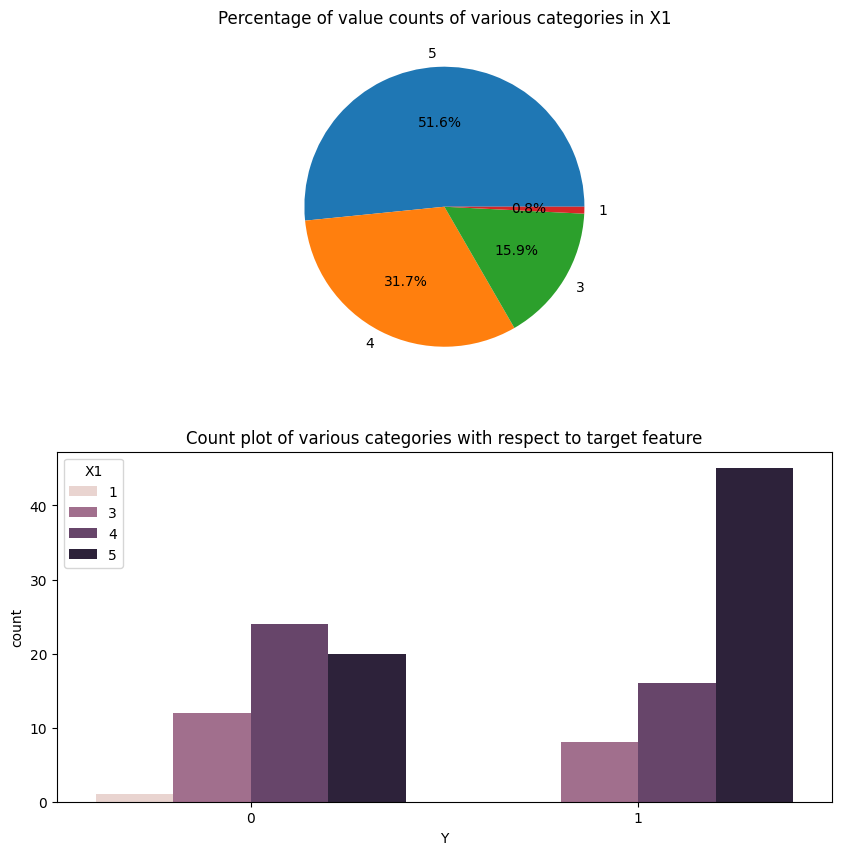

In [13]:
#VISUALIZING THROUGH PIE CHART AND CATEGORIZED COUNTPLOT
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10,10))
ax1 = axes[0]
ax2 = axes[1]
sns.countplot(x = 'Y', hue = 'X1', data = df, ax = ax2)
ax2.set_title('Count plot of various categories with respect to target feature')
ax1.pie(x = df['X1'].value_counts(normalize=True), labels = df['X1'].value_counts().index,\
       autopct='%1.1f%%', radius = 1)
ax1.set_title('Percentage of value counts of various categories in X1')
plt.show()

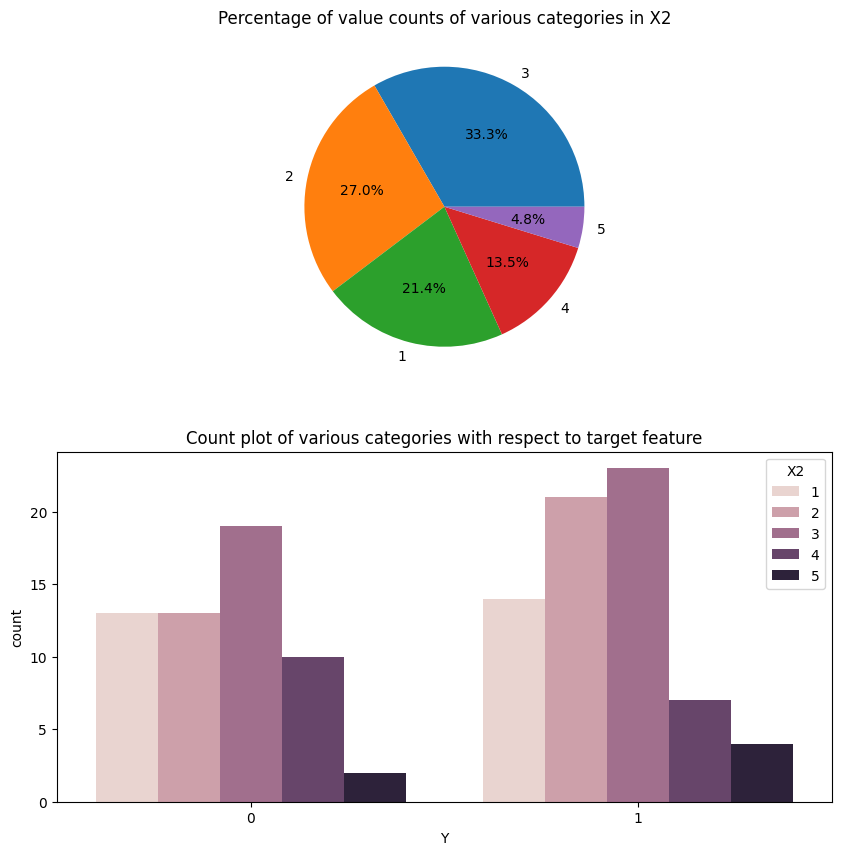

In [14]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10,10))
ax1 = axes[0]
ax2 = axes[1]
sns.countplot(x = 'Y', hue = 'X2', data = df, ax = ax2)
ax2.set_title('Count plot of various categories with respect to target feature')
ax1.pie(x = df['X2'].value_counts(normalize=True), labels = df['X2'].value_counts().index,\
       autopct='%1.1f%%', radius = 1)
ax1.set_title('Percentage of value counts of various categories in X2')
plt.show()

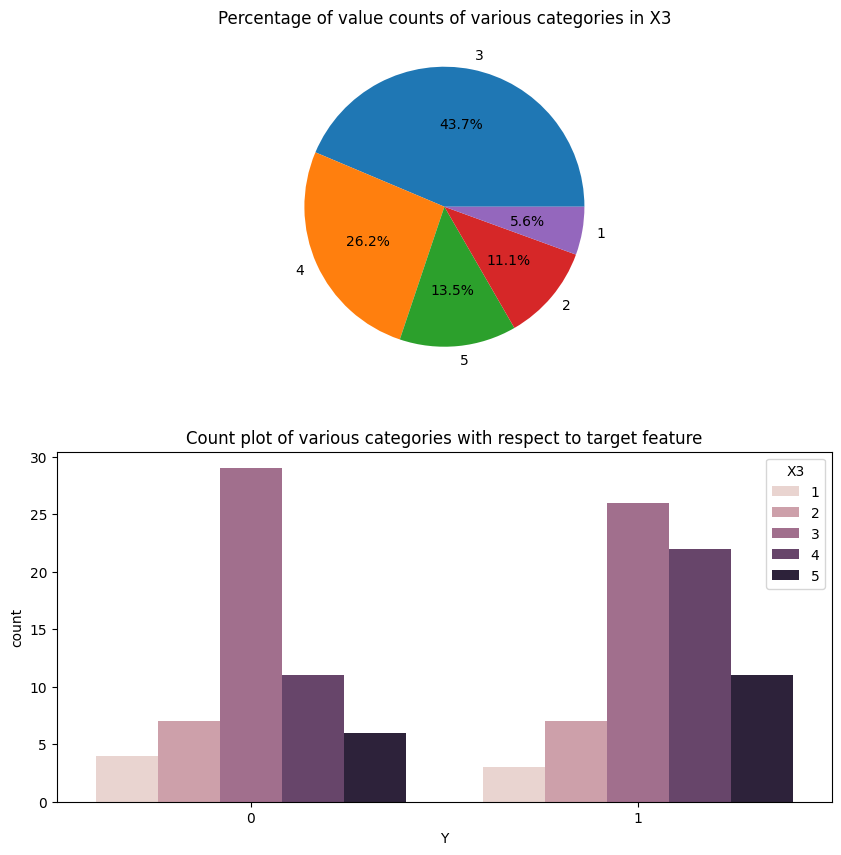

In [15]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10,10))
ax1 = axes[0]
ax2 = axes[1]
sns.countplot(x = 'Y', hue = 'X3', data = df, ax = ax2)
ax2.set_title('Count plot of various categories with respect to target feature')
ax1.pie(x = df['X3'].value_counts(normalize=True), labels = df['X3'].value_counts().index,\
       autopct='%1.1f%%', radius = 1)
ax1.set_title('Percentage of value counts of various categories in X3')
plt.show()

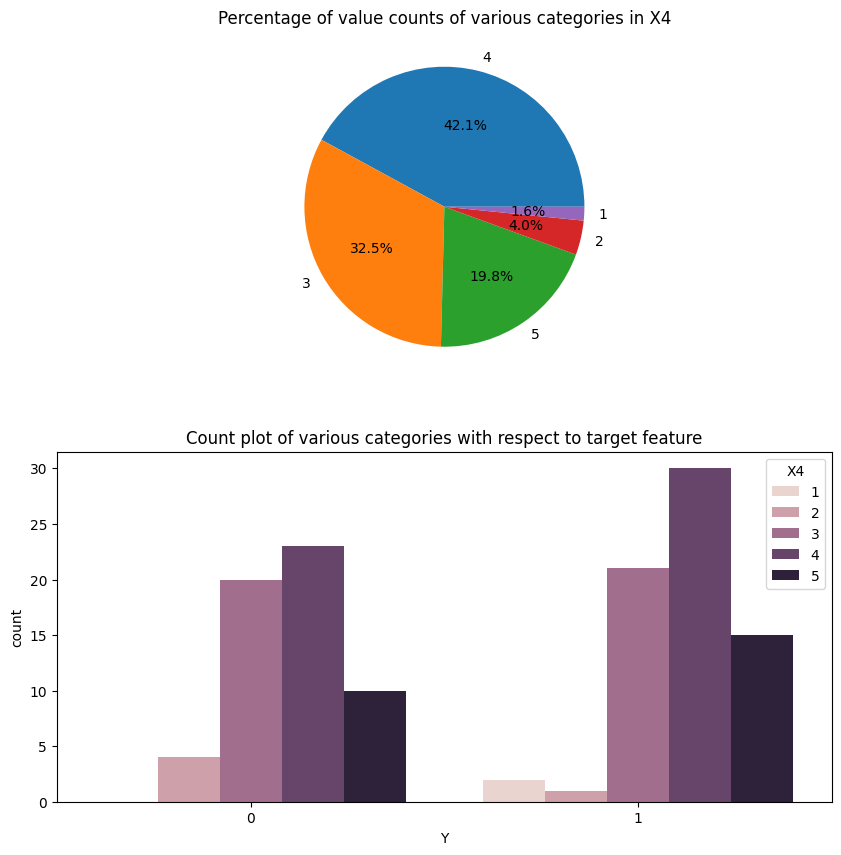

In [16]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10,10))
ax1 = axes[0]
ax2 = axes[1]
sns.countplot(x = 'Y', hue = 'X4', data = df, ax = ax2)
ax2.set_title('Count plot of various categories with respect to target feature')
ax1.pie(x = df['X4'].value_counts(normalize=True), labels = df['X4'].value_counts().index,\
       autopct='%1.1f%%', radius = 1)
ax1.set_title('Percentage of value counts of various categories in X4')
plt.show()

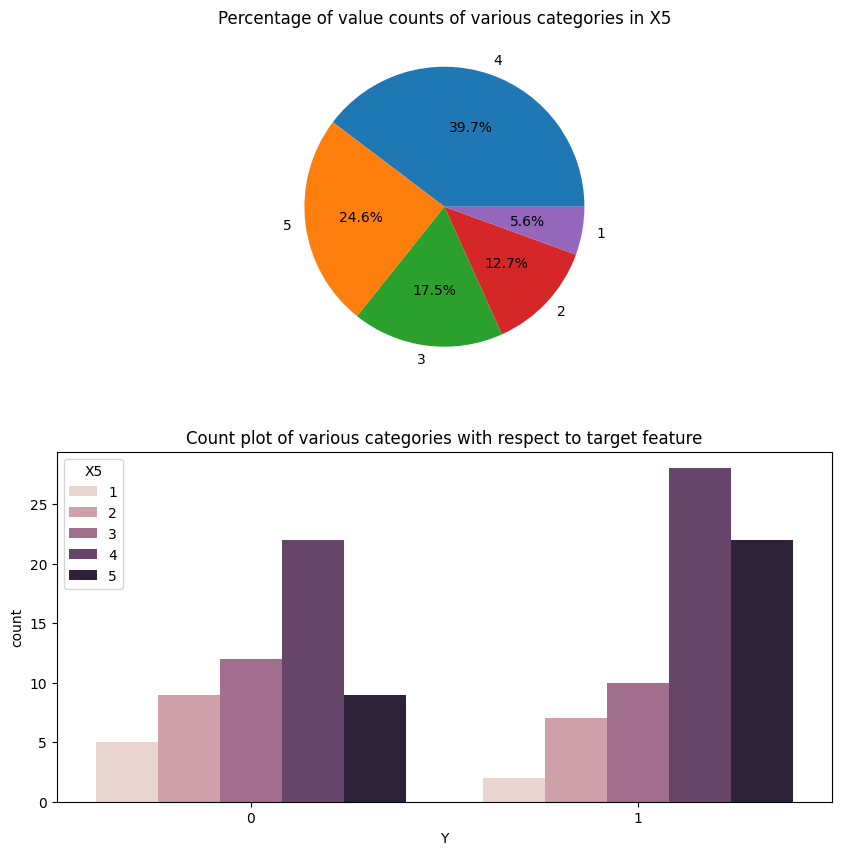

In [17]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10,10))
ax1 = axes[0]
ax2 = axes[1]
sns.countplot(x = 'Y', hue = 'X5', data = df, ax = ax2)
ax2.set_title('Count plot of various categories with respect to target feature')
ax1.pie(x = df['X5'].value_counts(normalize=True), labels = df['X5'].value_counts().index,\
       autopct='%1.1f%%', radius = 1)
ax1.set_title('Percentage of value counts of various categories in X5')
plt.show()

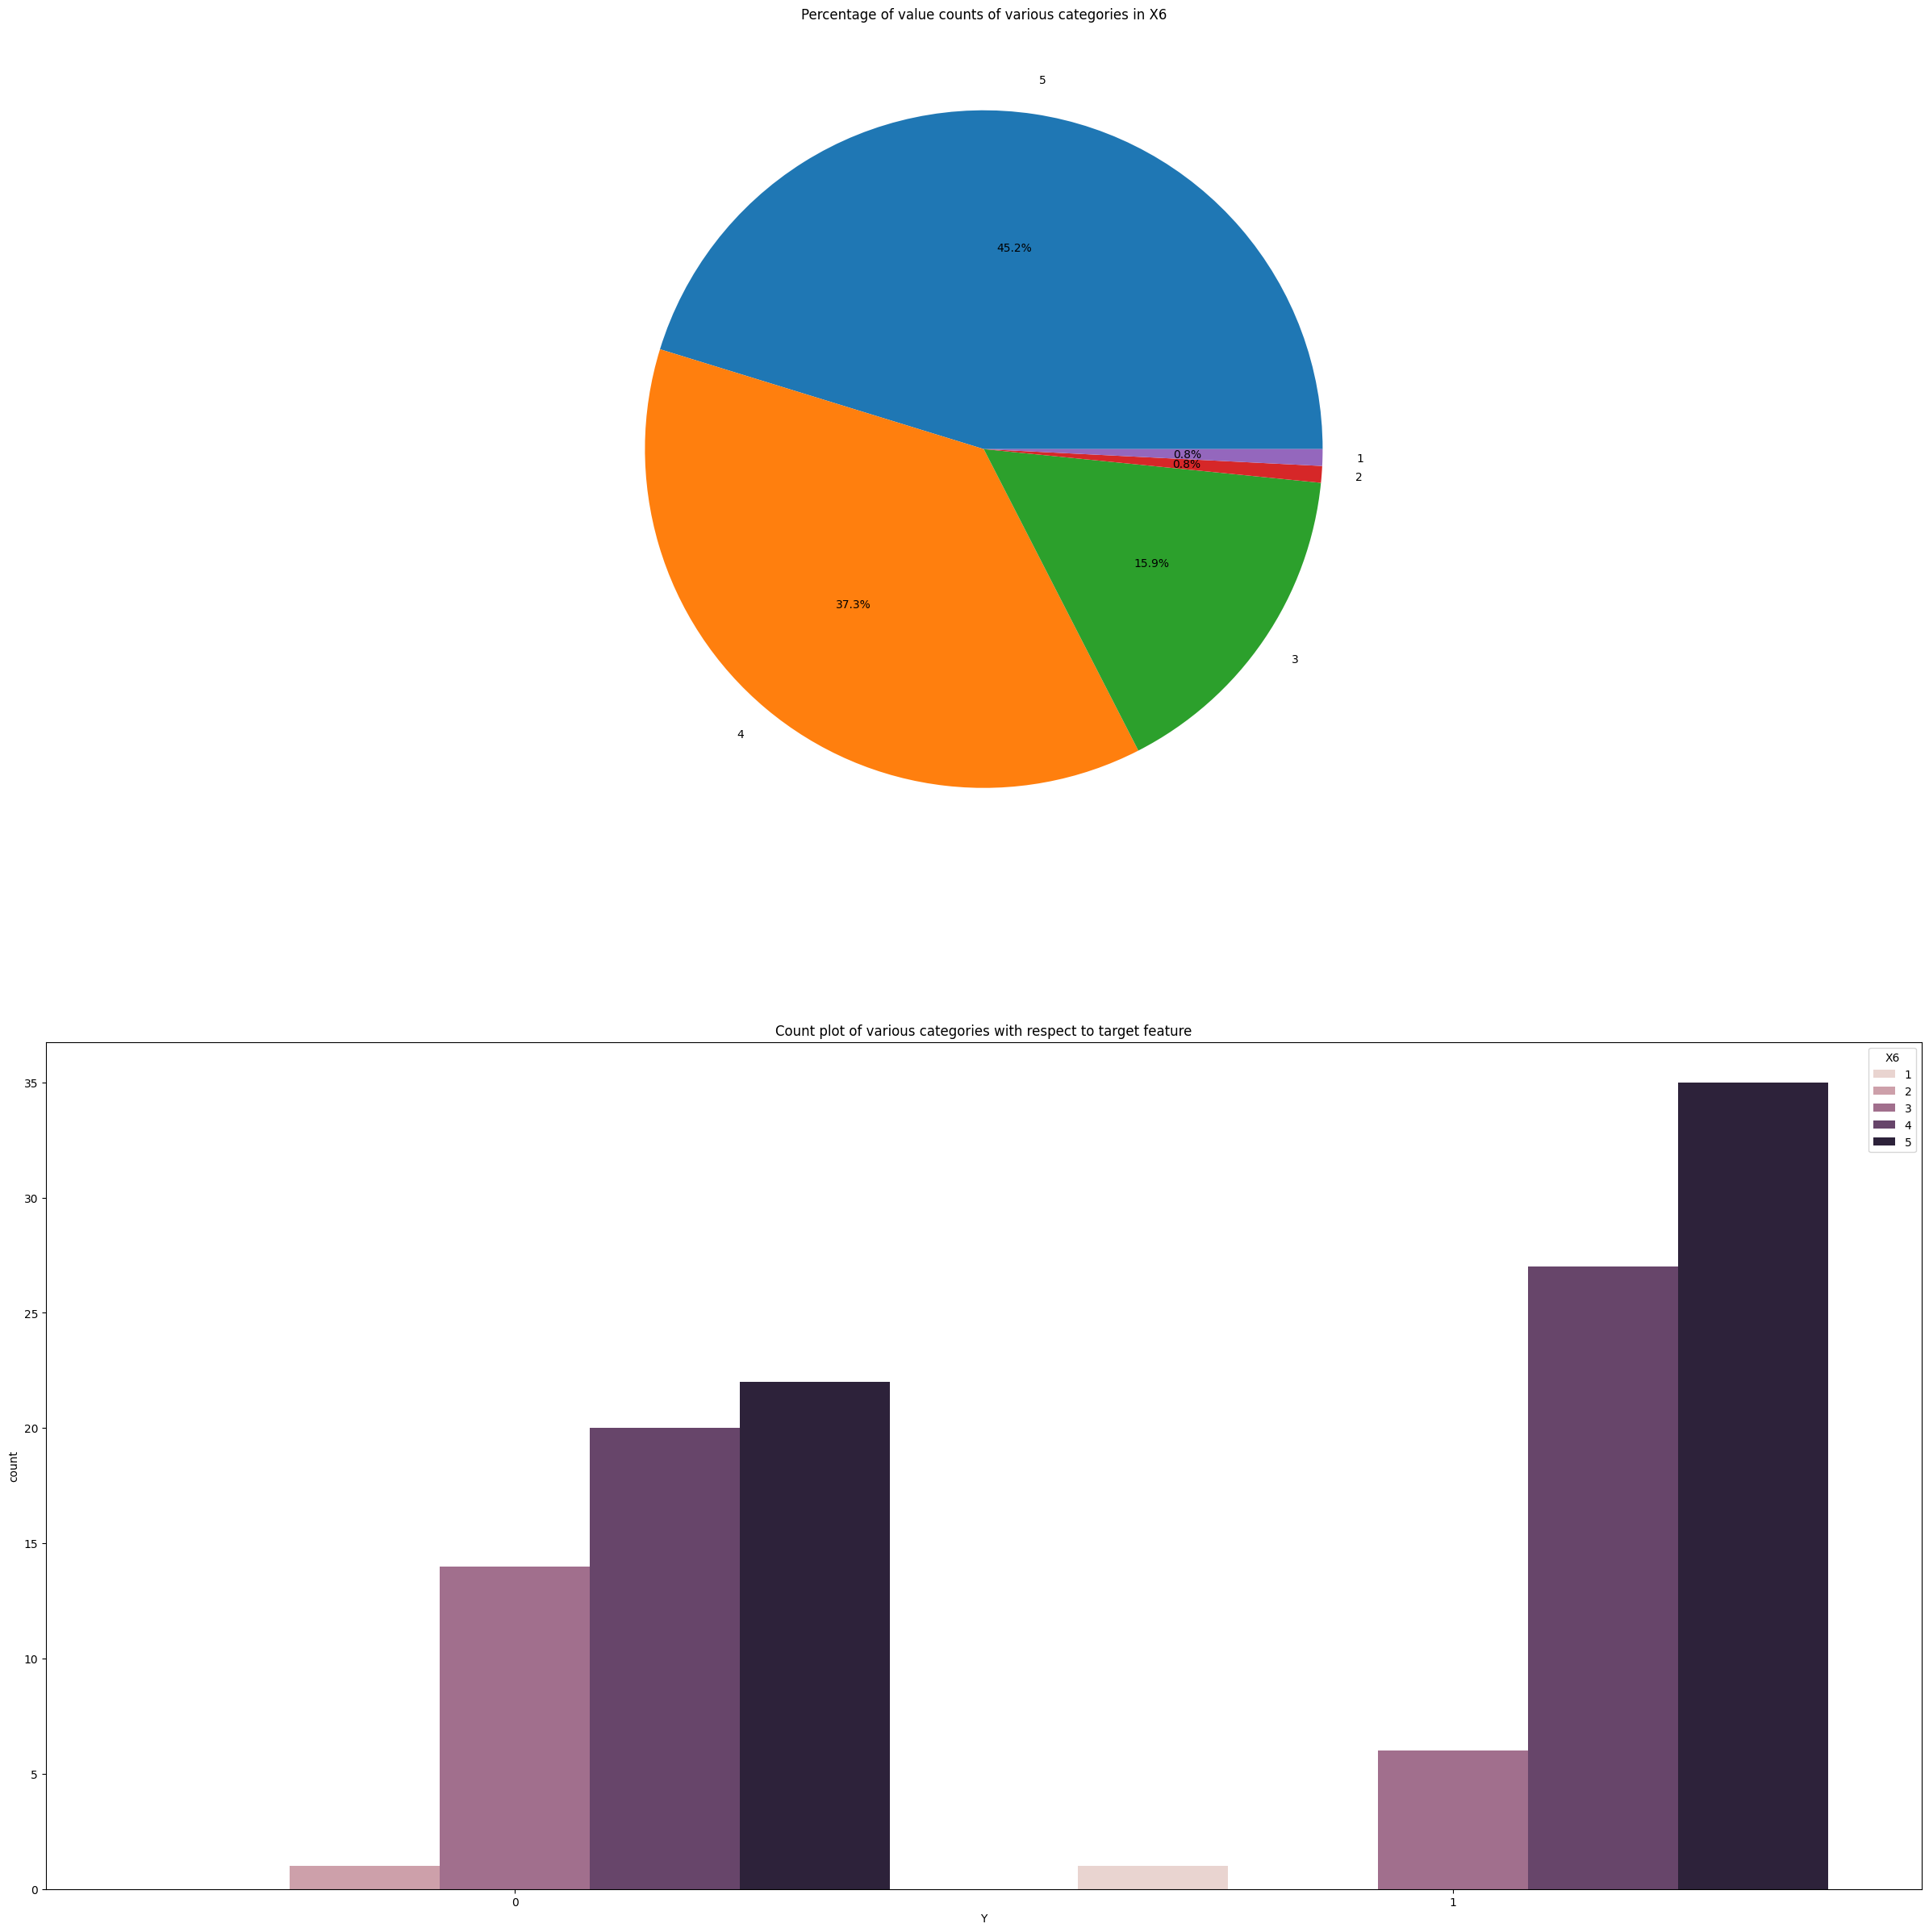

In [18]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (30,30))
ax1 = axes[0]
ax2 = axes[1]
sns.countplot(x = 'Y', hue = 'X6', data = df, ax = ax2)
ax2.set_title('Count plot of various categories with respect to target feature')
ax1.pie(x = df['X6'].value_counts(normalize=True), labels = df['X6'].value_counts().index,\
       autopct='%1.1f%%', radius = 1)
ax1.set_title('Percentage of value counts of various categories in X6')
plt.show()

SECTION O: ANALYZING THE TARGET - 1 -Yes  0-No

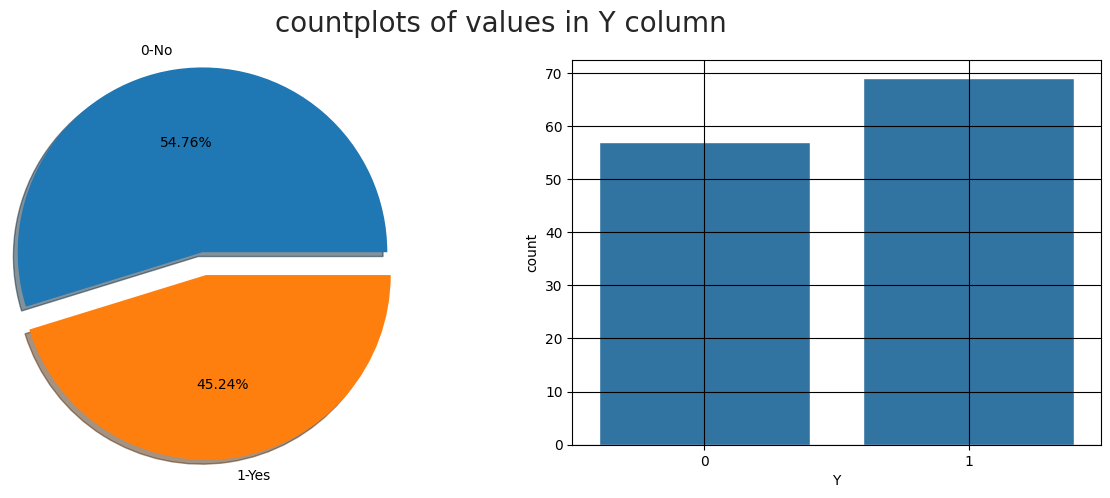

In [19]:
#Visualizing the target Y column
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize = (15,5))
ax1 = axes[0]
ax2 = axes[1]
ax1.pie(df['Y'].value_counts(normalize=True), explode = [0, 0.15], autopct = '%1.2f%%', labels = ['0-No', '1-Yes'],\
        radius=1.2, shadow = True)
sns.set_style(style = 'dark')
sns.countplot(x = 'Y', data = df)
fig.suptitle('countplots of values in Y column', fontsize = 20)
ax2.grid(True, color='black')
plt.show()

FEATURE(S) SELECTION Using correlation to check which feature most affect the target Y

Visualizing the Correlation Heatmap

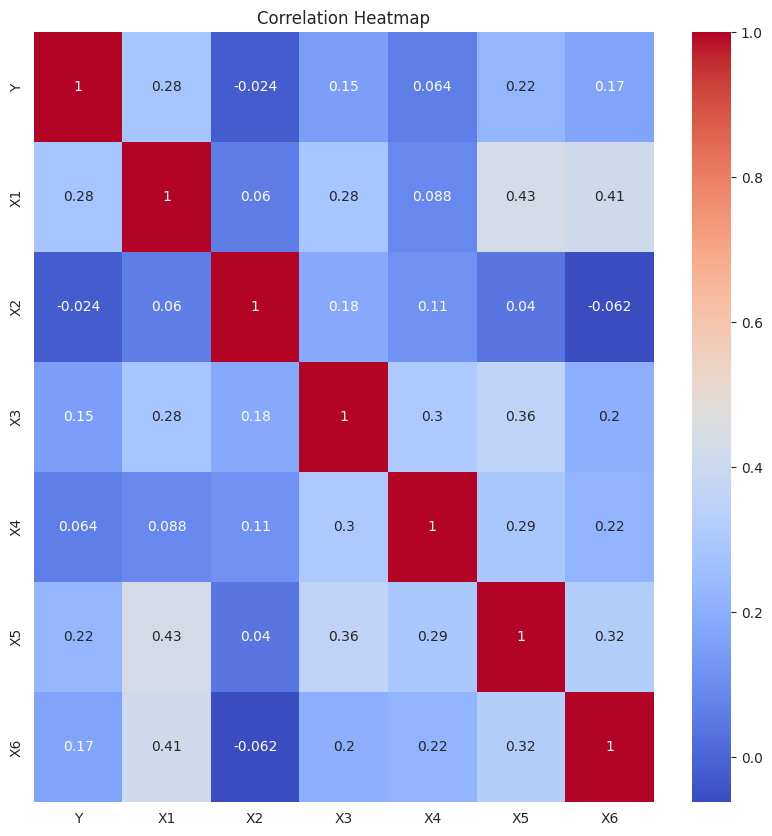

Index(['Y', 'X1', 'X5', 'X6', 'X3', 'X4', 'X2'], dtype='object')
[[1.         0.28016014 0.02427418 0.15083837 0.06441508 0.22452243
  0.16766932]]


In [20]:
correlation_matrix = df.corr()

# Create heatmap
plt.figure(figsize = (10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set plot title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()
print(df.corr().abs().nlargest(7,'Y').index)
print(df.corr().abs().nlargest(1,'Y').values)

# In order of impotance
X1 = my order was delivered on time

X5 = I am satisfied with my courier

X6 = the app makes ordering easy for me

X3 = I ordered everything I wanted to order

X4 = I paid a good price for my order

X2 = contents of my order was as I expected

NORMALIZATION AND PRINCIPAL COMPONENT ANALYSIS (PCA)

In [21]:
# Because the target variable is the first column, it is set aside
features = df.iloc[:, 1:]

In [22]:
scale = StandardScaler()
n_df = scale.fit_transform(features)

Explained Variance Percentage per Principal Component:
PC1: 37%
PC2: 19%
PC3: 15%
PC4: 12%
PC5: 10%
PC6: 8%


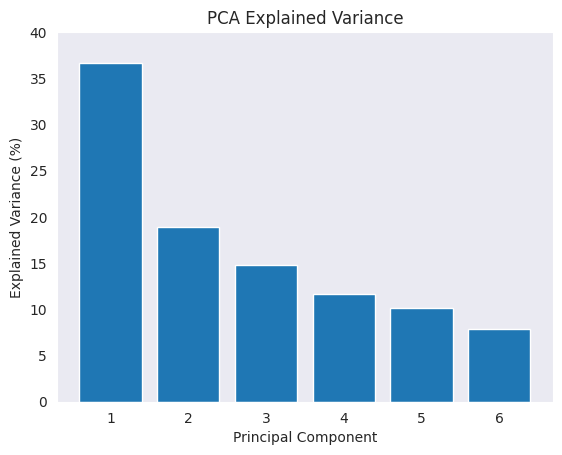

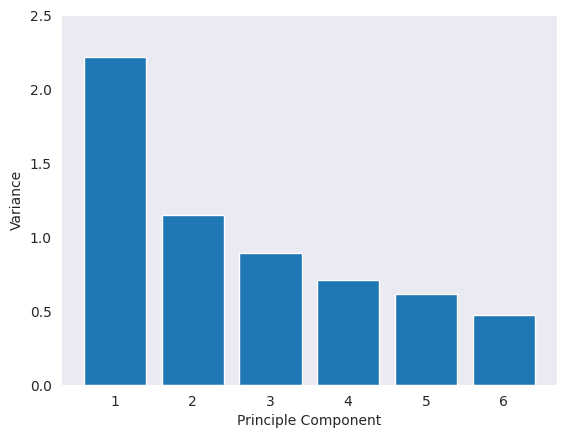

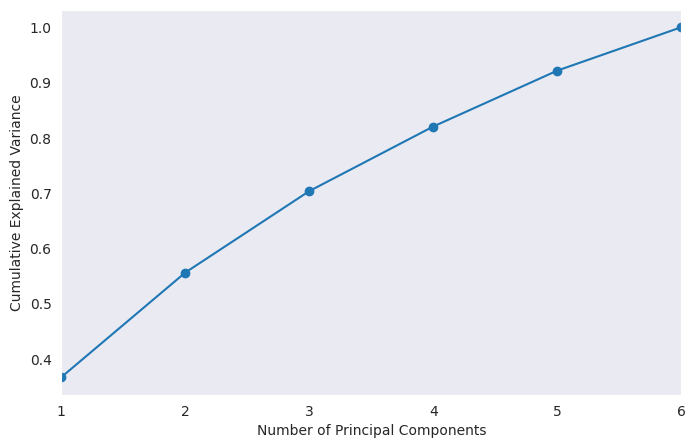

In [23]:
# Perform PCA
pca = PCA(n_components=6)
pca.fit(n_df)

# Get explained variance ratio (normalized to sum to 100%)
explained_variance_percentage = pca.explained_variance_ratio_ * 100

# Print results
print("Explained Variance Percentage per Principal Component:")
for i, var in enumerate(explained_variance_percentage):
    print(f"PC{i+1}: {var:.0f}%")

# Plot explained variance in percentage
plt.bar(range(1, pca.n_components_ + 1), explained_variance_percentage)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('PCA Explained Variance')
plt.ylim([0, 40])
plt.savefig('pca_explained_variance.png')
plt.show()

# Plot explained variance
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_)
plt.xlabel('Principle Component')
plt.ylabel('Variance')
#plt.xlim([-0.5, 6.5])
plt.ylim([0, 2.5])
plt.savefig('pca1.png')
plt.show()

# Calculate cumulative explained variance (as a ratio)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 7), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, 7))
plt.xlim(1, 6)
plt.savefig('pca2.png')
plt.show()


 X1 (Order delivered on time) 37%

 X5 (Satisfied with the courier) 19%

 X6 (App makes ordering easy) 15%

 X3 (Ordered everything I wanted) 12%

 X4(Paid a good price for my order) 10%

 X2 (Content ordered as expected) 8%

 This is the order of concern for the company

Final Analysis

Model Development & Classification

In [24]:
#Checking the target variable count
df.Y.value_counts()

,count
Y,
1,69
0,57


THERE IS NO SIGNIFICANT DISPARITY TO NECCESITATE DATA IMBALANCE PROBLEM

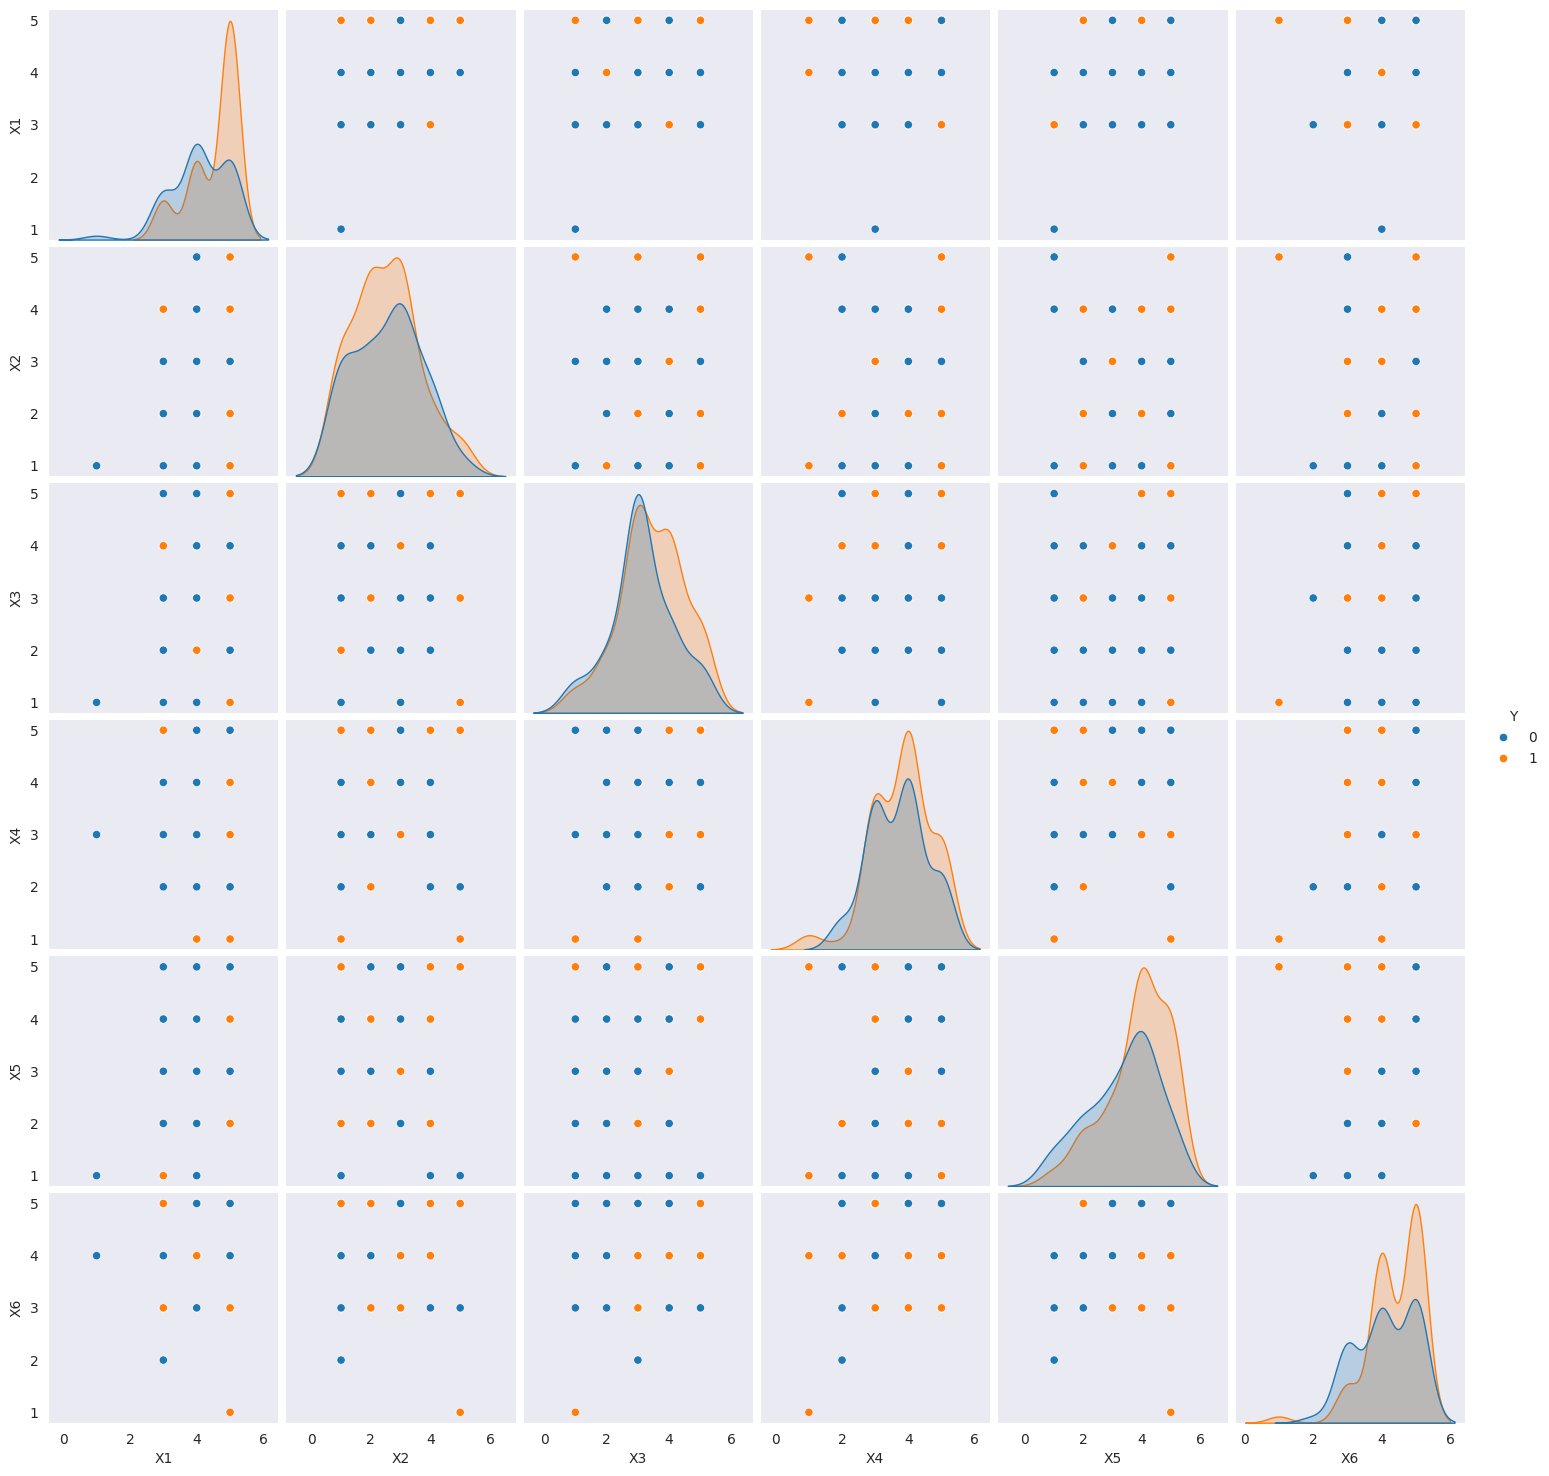

In [25]:
#VISUALIZE THE FEATURES THROUGH PAIRPLOT
# Create a pair plot
sns.pairplot(df, hue='Y')

# Display the plot
plt.show()

SPLITING THE DATA INTO TESTING DATA AND TRAINING DATA AND NORMALISATION

In [26]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [27]:
X,y

(     X1  X2  X3  X4  X5  X6
 0     3   3   3   4   2   4
 1     3   2   3   5   4   3
 2     5   3   3   3   3   5
 3     5   4   3   3   3   5
 4     5   4   3   3   3   5
 ..   ..  ..  ..  ..  ..  ..
 121   5   2   3   4   4   3
 122   5   2   3   4   2   5
 123   5   3   3   4   4   5
 124   4   3   3   4   4   5
 125   5   3   2   5   5   5
 
 [126 rows x 6 columns],
 0      0
 1      0
 2      1
 3      0
 4      0
       ..
 121    1
 122    1
 123    1
 124    0
 125    0
 Name: Y, Length: 126, dtype: int64)

In [28]:
#data splitting for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
print(X_test.shape, y_test.shape)

(26, 6) (26,)


APPLYING BOOSTERS

In [30]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold

In [31]:
clf1 = AdaBoostClassifier()
clf2 = GradientBoostingClassifier()

for clf, label in zip([clf1, clf2],
                      ['AdaBoost', 'GBDT']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=10)
    print("Accuracy: %0.3f (+/- %0.2f), Model Name[%s]" %
          (scores.mean(), scores.std(), label))

Accuracy: 0.600 (+/- 0.15), Model Name[AdaBoost]
Accuracy: 0.630 (+/- 0.17), Model Name[GBDT]


MODELS TUNED BY LAZY PREDICT

In [32]:
!pip install lazypredict

In [33]:
import lazypredict

In [34]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=-1,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 32/32 [00:04<00:00,  6.67it/s]

[LightGBM] [Info] Number of positive: 56, number of negative: 44
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.560000 -> initscore=0.241162
[LightGBM] [Info] Start training from score 0.241162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

In [35]:
best_models = models.sort_values(by=['Accuracy'], ascending=False).index.tolist()
list_models = best_models[:1] + best_models[2:11]  # Skips position Passive Agressive because it returns 100% recall(0) and 0% recall(1)
dict_models=dict()
dict_models.fromkeys(list_models)

{'Perceptron': None,
 'NearestCentroid': None,
 'AdaBoostClassifier': None,
 'GaussianNB': None,
 'SGDClassifier': None,
 'LogisticRegression': None,
 'LGBMClassifier': None,
 'BernoulliNB': None,
 'RidgeClassifierCV': None,
 'XGBClassifier': None}

Let's define a function that load each selected model while calling its name

In [36]:
!pip install lightgbm

In [44]:
import lightgbm as lgb

In [45]:
def load_model(name):
    if name=="XGBClassifier":
        model=XGBClassifier()
    elif name=="RandomForestClassifier":
        model=RandomForestClassifier()
    elif name=="AdaBoostClassifier":
        model=AdaBoostClassifier()
    elif name=="SGDClassifier":
        model=SGDClassifier()
    elif name=="LogisticRegression":
        model=LogisticRegression()
    elif name=="Perceptron":
        model=Perceptron()
    elif name=="NearestCentroid":
        model=NearestCentroid()
    elif name=="GaussianNB":
        model=GaussianNB()
    elif name=="LGBMClassifier":
        model=lgb.LGBMClassifier(verbose=-1)
    elif name=="BernoulliNB":
        model=BernoulliNB()
    elif name=="RidgeClassifierCV":
        model=RidgeClassifierCV()
    return model

Finding the best Model in Accuracy and Recall(0)

In [46]:
# List to store results for each seed iteration
seed_results = []

# Run 50 iterations, each with a different random seed
for i in range(50):
    # Generate a random seed and split the data (using stratify to maintain class proportions)
    seed = random.randint(1000, 9999)
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )

    # Dictionary to hold recall values for each model for this seed
    per_model_recall = {}

    # Variables to track the best model for this seed
    best_model_name_this_seed = None
    best_recall_this_seed = -1

    # Evaluate each model in list_models
    for model in list_models:
        # Load a fresh instance of the model (assumes load_model returns an untrained model)
        model_instance = load_model(model)
        model_instance.fit(X_train, Y_train)
        Y_pred = model_instance.predict(X_test)

        # Calculate recall for class 0 (using pos_label=0)
        recall_0 = recall_score(Y_test, Y_pred, pos_label=0)

        # Skip recording if recall_0 is exactly 1.0 (100%)
        if recall_0 == 1.0:
            continue

        per_model_recall[model] = recall_0

        # Check if this model is the best for this seed iteration
        if recall_0 > best_recall_this_seed:
            best_recall_this_seed = recall_0
            best_model_name_this_seed = model

    # Only save results if a valid best model was found
    if best_model_name_this_seed is not None:
        seed_results.append({
            'Seed': seed,
            'Best Model Name': best_model_name_this_seed,
            'Best Recall (Class 0)': best_recall_this_seed,
            'Per Model Recall': per_model_recall
        })
        print(f"Seed {seed}: Best model is {best_model_name_this_seed} with recall {best_recall_this_seed:.4f}")

# Convert the results to a DataFrame for display
results_df = pd.DataFrame(seed_results)

# Ensure we only proceed if we have valid results
if not results_df.empty:
    # Count how many times each model was the best across the remaining seeds
    best_model_frequency = results_df['Best Model Name'].value_counts().reset_index()
    best_model_frequency.columns = ['Model', 'Frequency']

    # Identify the overall best model: the one that appears most frequently as best
    overall_best_model_name = best_model_frequency.iloc[0]['Model']

    print("\nOverall Model Recall Results (Best model per seed):")
    print(results_df[['Seed', 'Best Model Name', 'Best Recall (Class 0)']].sort_values(by='Seed').reset_index(drop=True))

    print("\nFrequency of each model being the best across seeds:")
    print(best_model_frequency)

    print(f"\nMost Consistent Model: {overall_best_model_name}")
else:
    print("No valid models found (all had recall of 1.0).")

Seed 9338: Best model is XGBClassifier with recall 0.5833
Seed 7908: Best model is SGDClassifier with recall 0.8333
Seed 3174: Best model is NearestCentroid with recall 0.6667
Seed 7402: Best model is NearestCentroid with recall 0.6667
Seed 1971: Best model is Perceptron with recall 0.6667
Seed 9821: Best model is XGBClassifier with recall 0.6667
Seed 5923: Best model is AdaBoostClassifier with recall 0.9167
Seed 3826: Best model is SGDClassifier with recall 0.8333
Seed 1474: Best model is NearestCentroid with recall 0.7500
Seed 7455: Best model is NearestCentroid with recall 0.5833
Seed 6071: Best model is NearestCentroid with recall 0.5833
Seed 9286: Best model is SGDClassifier with recall 0.6667
Seed 3166: Best model is NearestCentroid with recall 0.6667
Seed 5994: Best model is XGBClassifier with recall 0.8333
Seed 5300: Best model is Perceptron with recall 0.9167
Seed 4773: Best model is Perceptron with recall 0.9167
Seed 7637: Best model is NearestCentroid with recall 0.5833
Seed

In [47]:
# ========================= ADDITION: TOP 3 UNIQUE MODELS WITH HIGHEST RECALL =========================
# Drop duplicate model names while keeping the highest recall for each model
top_3_unique_models = results_df.sort_values(by='Best Recall (Class 0)', ascending=False).drop_duplicates(subset=['Best Model Name']).head(3)

print("\nTop 3 Unique Models with the Highest Recall (Class 0):")
print(top_3_unique_models[['Seed', 'Best Model Name', 'Best Recall (Class 0)']])



Top 3 Unique Models with the Highest Recall (Class 0):
    Seed     Best Model Name  Best Recall (Class 0)
27  6382       SGDClassifier                   0.92
6   5923  AdaBoostClassifier                   0.92
20  2854          Perceptron                   0.92


NearestCentroid is chosen for consistency and high recall(0) and these 3 will be used for the ensembles


Classification Report for the Overall Best Model:
              precision    recall  f1-score   support

           0       0.69      0.92      0.79        12
           1       0.90      0.64      0.75        14

    accuracy                           0.77        26
   macro avg       0.79      0.78      0.77        26
weighted avg       0.80      0.77      0.77        26



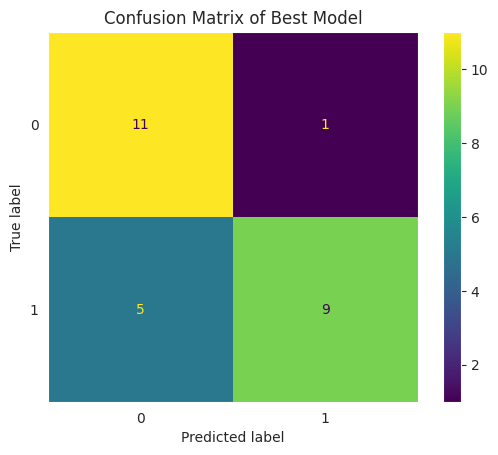

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=4715, stratify=y)
Best_Model=NearestCentroid()
Best_Model.fit(X_train, Y_train)
Y_pred = Best_Model.predict(X_test)
print("\nClassification Report for the Overall Best Model:")
print(classification_report(Y_test, Y_pred))
# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)
plt.title("Confusion Matrix of Best Model")
plt.show()

In [49]:
from sklearn.ensemble import VotingClassifier

In [50]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import SGDClassifier

# List to store recall and accuracy results for each seed iteration
seed_results = []
# Dictionary to keep ensemble models for each seed
ensemble_models = {}

# Run 50 iterations with different random seeds
for i in range(50):
    # Generate a random seed and split the data (with stratification)
    seed = random.randint(1000, 9999)
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )

    # Define the base classifiers
    clf1 = NearestCentroid()
    clf2 = SGDClassifier(random_state=4013)
    clf3 = Perceptron(random_state=1551)

    # Create the VotingClassifier ensemble using hard voting
    ensemble_vc = VotingClassifier(
        estimators=[('NC', clf1), ('SDGC', clf2), ('Perceptron', clf3)],
        voting='hard'
    )

    # Fit the ensemble on training data
    ensemble_vc.fit(X_train, Y_train)

    # Predict on the test data
    Y_pred_vc = ensemble_vc.predict(X_test)

    # Calculate recall for class 0 and accuracy
    recall_0 = recall_score(Y_test, Y_pred_vc, pos_label=0)
    accuracy = accuracy_score(Y_test, Y_pred_vc)

    # Store results for this iteration
    seed_results.append({
        'Seed': seed,
        'Recall (Class 0)': recall_0,
        'Accuracy': accuracy
    })
    # Save the trained ensemble for this seed
    ensemble_models[seed] = ensemble_vc

    print(f"Seed {seed}: Recall (Class 0) = {recall_0:.4f}, Accuracy = {accuracy:.4f}")

# Convert results to a DataFrame for display and analysis
results_df = pd.DataFrame(seed_results)

# Ensure we proceed only if we have valid results
if not results_df.empty:
    # Sort results by highest recall (then by accuracy if there's a tie)
    results_df = results_df.sort_values(by=['Recall (Class 0)', 'Accuracy'], ascending=[False, False]).reset_index(drop=True)

    print("\nVoting Ensemble Model Results (50 seeds):")
    print(results_df)
else:
    print("\nNo valid models found.")


Seed 2242: Recall (Class 0) = 0.4167, Accuracy = 0.6154
Seed 8899: Recall (Class 0) = 0.5000, Accuracy = 0.6538
Seed 8715: Recall (Class 0) = 0.2500, Accuracy = 0.3077
Seed 4986: Recall (Class 0) = 0.5833, Accuracy = 0.6154
Seed 7650: Recall (Class 0) = 0.5833, Accuracy = 0.5385
Seed 3126: Recall (Class 0) = 0.5833, Accuracy = 0.6154
Seed 4798: Recall (Class 0) = 0.7500, Accuracy = 0.7308
Seed 9468: Recall (Class 0) = 0.6667, Accuracy = 0.6538
Seed 3659: Recall (Class 0) = 0.7500, Accuracy = 0.5385
Seed 7502: Recall (Class 0) = 1.0000, Accuracy = 0.5769
Seed 8948: Recall (Class 0) = 1.0000, Accuracy = 0.4615
Seed 1826: Recall (Class 0) = 0.2500, Accuracy = 0.5769
Seed 5451: Recall (Class 0) = 0.9167, Accuracy = 0.5385
Seed 3433: Recall (Class 0) = 0.5833, Accuracy = 0.6154
Seed 5036: Recall (Class 0) = 0.4167, Accuracy = 0.4615
Seed 3223: Recall (Class 0) = 1.0000, Accuracy = 0.4615
Seed 4641: Recall (Class 0) = 0.2500, Accuracy = 0.5000
Seed 2694: Recall (Class 0) = 0.7500, Accuracy =


Best Chosen Seed: 7833

Best Model Performance on Test Data:
Recall (Class 0): 0.8333
Accuracy: 0.8077

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.85      0.79      0.81        14

    accuracy                           0.81        26
   macro avg       0.81      0.81      0.81        26
weighted avg       0.81      0.81      0.81        26



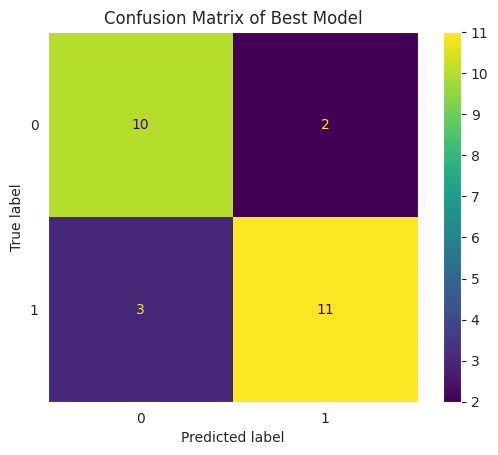

In [51]:
# Define the base classifiers
clf1 = NearestCentroid()
clf2 = SGDClassifier(random_state=4013)
clf3 = Perceptron(random_state=1551)
# Fit the ensemble on training data
# Create the VotingClassifier ensemble using hard voting
ensemble_vc = VotingClassifier(estimators=[('NC', clf1), ('SDGC', clf2), ('Perceptron', clf3)],voting='hard')


# Retrieve the best trained model using the best seed
#best_model = ensemble_models[int(best_seed)]
random_state = 7833
# Re-split data using the best seed
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=7833, stratify=y)
ensemble_vc.fit(X_train, Y_train)
# Predict using the best model
Y_pred_best = ensemble_vc.predict(X_test)
# Compute recall and accuracy
best_recall = recall_score(Y_test, Y_pred_best, pos_label=0)
best_accuracy = accuracy_score(Y_test, Y_pred_best)
print(f"\nBest Chosen Seed: {random_state:.0f}")

print(f"\nBest Model Performance on Test Data:")
print(f"Recall (Class 0): {best_recall:.4f}")
print(f"Accuracy: {best_accuracy:.4f}")
# Print classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_best))

# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_best)
plt.title("Confusion Matrix of Best Model")
plt.show()

In [52]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import SGDClassifier

# List to store recall and accuracy results for each seed iteration
seed_results = []
# Dictionary to keep ensemble (stacking) models for each seed
ensemble_models = {}

# Run 50 iterations with different random seeds
for i in range(50):
    # Generate a random seed and split the data (with stratification)
    seed = random.randint(1000, 9999)
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )

    # Define base classifiers with the current seed (where applicable)
    clf1 = NearestCentroid()  # No random_state needed
    clf2 = SGDClassifier(random_state=4013)  # SGDClassifier supports random_state
    clf3 = Perceptron(random_state=1551)  # Perceptron supports random_state

    # Define the final estimator for stacking
    final_estimator = LogisticRegression(random_state=seed, max_iter=1000)

    # Create the StackingClassifier ensemble
    ensemble_sc = StackingClassifier(
        estimators=[('NC', clf1), ('SDGC', clf2), ('Perceptron', clf3)],
        final_estimator=final_estimator,
        passthrough=False  # Set to True to include original features in final estimator
    )

    # Fit the ensemble on training data
    ensemble_sc.fit(X_train, Y_train)

    # Predict on the test data
    Y_pred_sc = ensemble_sc.predict(X_test)

    # Calculate recall for class 0 and accuracy
    recall_0 = recall_score(Y_test, Y_pred_sc, pos_label=0)
    accuracy = accuracy_score(Y_test, Y_pred_sc)

    # Store results for this iteration, but exclude cases where recall is 100%
    if recall_0 < 1.0:
        seed_results.append({
            'Seed': seed,
            'Recall (Class 0)': recall_0,
            'Accuracy': accuracy
        })
        # Save the trained ensemble for this seed
        ensemble_models[seed] = ensemble_sc

        print(f"Seed {seed}: Stacking SC recall (class 0) = {recall_0:.4f}, Accuracy = {accuracy:.4f}")

# Convert results to a DataFrame for display and analysis
results_df = pd.DataFrame(seed_results)

# Ensure we proceed only if we have valid results
if not results_df.empty:
    # Sort by highest recall (then by accuracy if there's a tie)
    results_df = results_df.sort_values(by=['Recall (Class 0)', 'Accuracy'], ascending=[False, False]).reset_index(drop=True)

    print("\nStacking Ensemble Model Results (50 seeds):")
    print(results_df)
else:
    print("\nNo valid models found.")

Seed 6895: Stacking SC recall (class 0) = 0.0000, Accuracy = 0.5385
Seed 6966: Stacking SC recall (class 0) = 0.2500, Accuracy = 0.5385
Seed 6077: Stacking SC recall (class 0) = 0.2500, Accuracy = 0.5385
Seed 6877: Stacking SC recall (class 0) = 0.4167, Accuracy = 0.6538
Seed 2092: Stacking SC recall (class 0) = 0.0833, Accuracy = 0.5769
Seed 8445: Stacking SC recall (class 0) = 0.5000, Accuracy = 0.5385
Seed 6123: Stacking SC recall (class 0) = 0.5000, Accuracy = 0.6154
Seed 9322: Stacking SC recall (class 0) = 0.0000, Accuracy = 0.5385
Seed 6179: Stacking SC recall (class 0) = 0.2500, Accuracy = 0.5000
Seed 1857: Stacking SC recall (class 0) = 0.4167, Accuracy = 0.6923
Seed 3030: Stacking SC recall (class 0) = 0.5833, Accuracy = 0.6923
Seed 8897: Stacking SC recall (class 0) = 0.4167, Accuracy = 0.4231
Seed 7067: Stacking SC recall (class 0) = 0.4167, Accuracy = 0.5385
Seed 2735: Stacking SC recall (class 0) = 0.4167, Accuracy = 0.5000
Seed 9191: Stacking SC recall (class 0) = 0.4167


Best Chosen Seed: 8269

Best Model Performance on Test Data:
Recall (Class 0): 0.9167
Accuracy: 0.6154

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.92      0.69        12
           1       0.83      0.36      0.50        14

    accuracy                           0.62        26
   macro avg       0.69      0.64      0.59        26
weighted avg       0.70      0.62      0.59        26



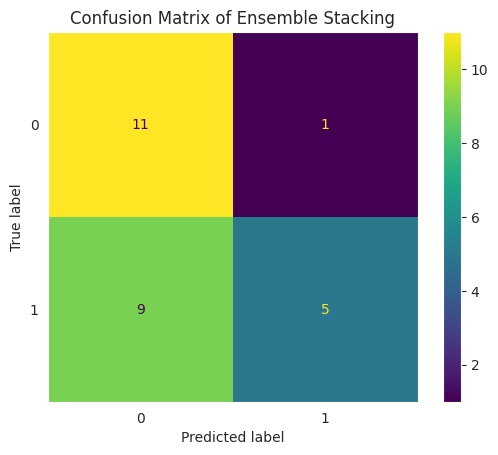

In [53]:
# Define the base classifiers
clf1 = NearestCentroid()
clf2 = SGDClassifier(random_state=4013)
clf3 = Perceptron(random_state=1551)
# Retrieve the best trained model using the best seed
random_state = 8269
# Define the final estimator for stacking
final_estimator = LogisticRegression(random_state=random_state, max_iter=1000)
# Fit the ensemble on training data
# Create the VotingClassifier ensemble using hard voting
 # Create the StackingClassifier ensemble
ensemble_sc = StackingClassifier(estimators=[('NC', clf1), ('SDGC', clf2), ('Perceptron', clf3)],final_estimator=final_estimator,
        passthrough=False  # Set to True to include original features in final estimator
                                 )


# Re-split data using the best seed
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
ensemble_sc.fit(X_train, Y_train)
# Predict using the best model
Y_pred_best = ensemble_sc.predict(X_test)
# Compute recall and accuracy
best_recall = recall_score(Y_test, Y_pred_best, pos_label=0)
best_accuracy = accuracy_score(Y_test, Y_pred_best)
print(f"\nBest Chosen Seed: {random_state:.0f}")

print(f"\nBest Model Performance on Test Data:")
print(f"Recall (Class 0): {best_recall:.4f}")
print(f"Accuracy: {best_accuracy:.4f}")
# Print classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_best))

# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_best)
plt.title("Confusion Matrix of Ensemble Stacking")
plt.show()

NearestCentroid is not compactable with RFE, SGDClassifier will be used instead

In [54]:
from sklearn.feature_selection import RFE

# Create a base estimator
estimator = SGDClassifier()

# Set up RFE to select the top features
selector = RFE(estimator, n_features_to_select=1, step=1)  # step=1 means remove one feature at a time

# Fit RFE on the data
selector = selector.fit(X, y)

# Get the mask of selected features
selected_features_mask = selector.support_

# Get the ranking of features (1 is the most important)
feature_ranking = selector.ranking_

# Optionally, create a DataFrame to display feature names, selection status, and ranking
feature_summary = pd.DataFrame({
    'Feature': X.columns,
    'Selected': selected_features_mask,
    'Ranking': feature_ranking
}).sort_values(by='Ranking')

print(feature_summary)

  Feature  Selected  Ranking
0      X1      True        1
4      X5     False        2
1      X2     False        3
2      X3     False        4
5      X6     False        5
3      X4     False        6


In [55]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

Using Nearest Centroid Model to select the features

Precision = 69.2%
Recall(0) = 66.7%
Accuracy = 65.4%


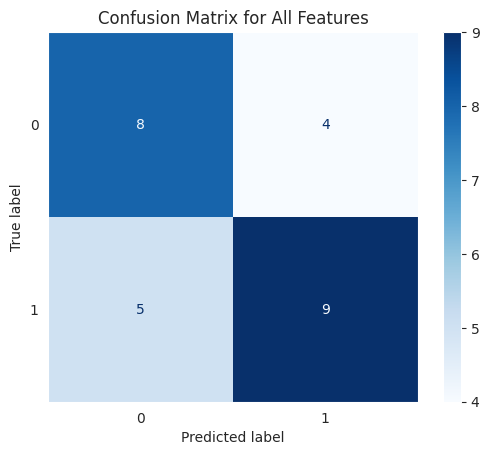

-----------------------------------------------------------------------
-----------------------------------------------------------------------
-----------------------------------------------------------------------
Precision = 69.2%
Recall(0) = 66.7%
Accuracy = 65.4%


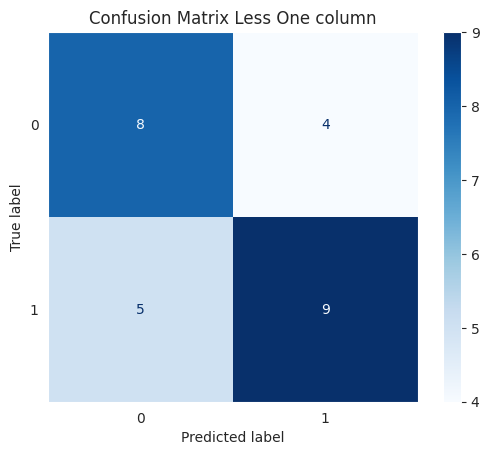

-----------------------------------------------------------------------
-----------------------------------------------------------------------
-----------------------------------------------------------------------
Precision = 60.0%
Recall(0) = 50.0%
Accuracy = 57.7%


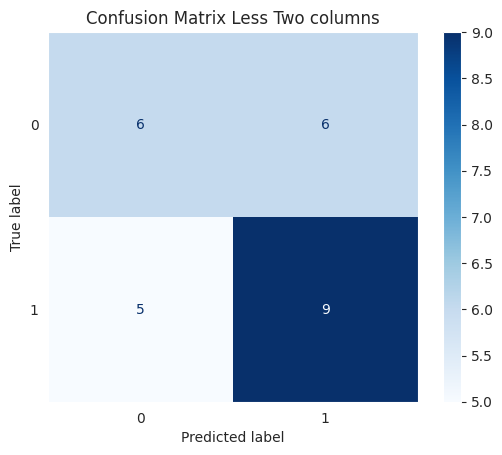

-----------------------------------------------------------------------
-----------------------------------------------------------------------
-----------------------------------------------------------------------
Precision = 66.7%
Recall(0) = 58.3%
Accuracy = 65.4%


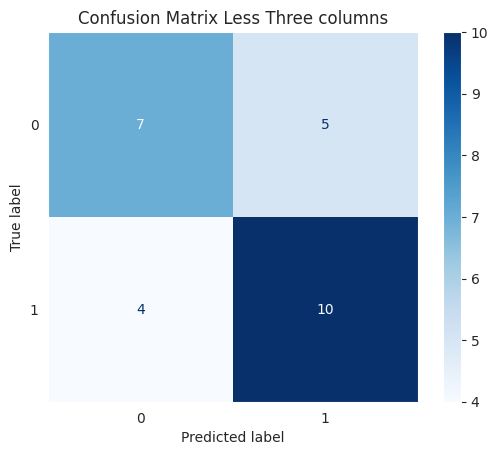

-----------------------------------------------------------------------
-----------------------------------------------------------------------
-----------------------------------------------------------------------
Precision = 75.0%
Recall(0) = 75.0%
Accuracy = 69.2%


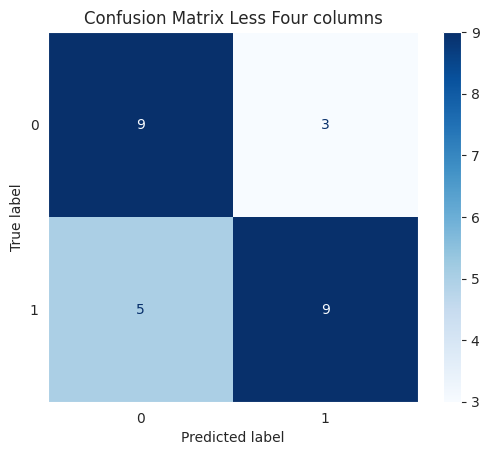

-----------------------------------------------------------------------
-----------------------------------------------------------------------
-----------------------------------------------------------------------
Precision = 81.8%
Recall(0) = 83.3%
Accuracy = 73.1%


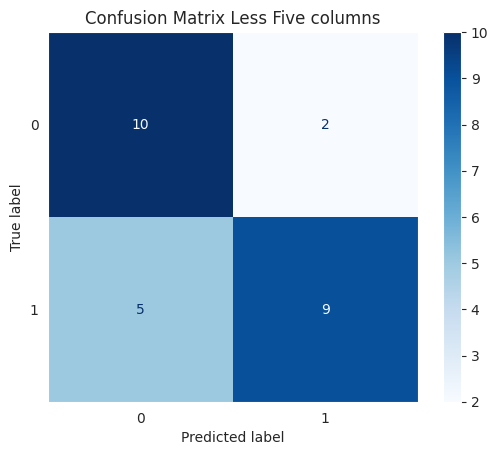

In [56]:
model=NearestCentroid()
model.fit(X_train, Y_train)
y_pred=model.predict(X_test)

# Multiply by 100 to convert to percentage and format to 1 decimal place
print("Precision = {:.1f}%".format(precision_score(Y_test, y_pred) * 100))
print("Recall(0) = {:.1f}%".format(recall_score(Y_test, y_pred, pos_label=0) * 100))
print("Accuracy = {:.1f}%".format(accuracy_score(Y_test, y_pred) * 100))

# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # You can change the color map if needed
plt.title("Confusion Matrix for All Features")
plt.show()
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------')

# Drop X2 column - remaining 5 features
X_train_less1 = np.delete(X_train, 1, axis=1)
X_test_less1 = np.delete(X_test, 1, axis=1)

model.fit(X_train_less1, y_train)
y_pred=model.predict(X_test_less1)

# Multiply by 100 to convert to percentage and format to 1 decimal place
print("Precision = {:.1f}%".format(precision_score(Y_test, y_pred) * 100))
print("Recall(0) = {:.1f}%".format(recall_score(Y_test, y_pred, pos_label=0) * 100))
print("Accuracy = {:.1f}%".format(accuracy_score(Y_test, y_pred) * 100))

# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # You can change the color map if needed
plt.title("Confusion Matrix Less One column")
plt.show()
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------')

# Drop X6 column - remaining 4 features
X_train_less2 = np.delete(X_train_less1, 4, axis=1)
X_test_less2 = np.delete(X_test_less1, 4, axis=1)

model.fit(X_train_less2, y_train)
y_pred=model.predict(X_test_less2)

# Multiply by 100 to convert to percentage and format to 1 decimal place
print("Precision = {:.1f}%".format(precision_score(Y_test, y_pred) * 100))
print("Recall(0) = {:.1f}%".format(recall_score(Y_test, y_pred, pos_label=0) * 100))
print("Accuracy = {:.1f}%".format(accuracy_score(Y_test, y_pred) * 100))

# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # You can change the color map if needed
plt.title("Confusion Matrix Less Two columns")
plt.show()

print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------')
# Drop X3 column - remaining 3 features
X_train_less3 = np.delete(X_train_less2, 1, axis=1)
X_test_less3 = np.delete(X_test_less2, 1, axis=1)

model.fit(X_train_less3, y_train)
y_pred=model.predict(X_test_less3)

# Multiply by 100 to convert to percentage and format to 1 decimal place
print("Precision = {:.1f}%".format(precision_score(Y_test, y_pred) * 100))
print("Recall(0) = {:.1f}%".format(recall_score(Y_test, y_pred, pos_label=0) * 100))
print("Accuracy = {:.1f}%".format(accuracy_score(Y_test, y_pred) * 100))

# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # You can change the color map if needed
plt.title("Confusion Matrix Less Three columns")
plt.show()

print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------')
# Drop X4 column - remaining 2 features
X_train_less4 = np.delete(X_train_less3, 1, axis=1)
X_test_less4 = np.delete(X_test_less3, 1, axis=1)

model.fit(X_train_less4, y_train)
y_pred=model.predict(X_test_less4)

# Multiply by 100 to convert to percentage and format to 1 decimal place
print("Precision = {:.1f}%".format(precision_score(Y_test, y_pred) * 100))
print("Recall(0) = {:.1f}%".format(recall_score(Y_test, y_pred, pos_label=0) * 100))
print("Accuracy = {:.1f}%".format(accuracy_score(Y_test, y_pred) * 100))

# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # You can change the color map if needed
plt.title("Confusion Matrix Less Four columns")
plt.show()
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------')
# Drop X5 column remaining X1
X_train_less5 = np.delete(X_train_less4, 1, axis=1)
X_test_less5 = np.delete(X_test_less4, 1, axis=1)

model.fit(X_train_less5, y_train)
y_pred=model.predict(X_test_less5)

# Multiply by 100 to convert to percentage and format to 1 decimal place
print("Precision = {:.1f}%".format(precision_score(Y_test, y_pred) * 100))
print("Recall(0) = {:.1f}%".format(recall_score(Y_test, y_pred, pos_label=0) * 100))
print("Accuracy = {:.1f}%".format(accuracy_score(Y_test, y_pred) * 100))

# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # You can change the color map if needed
plt.title("Confusion Matrix Less Five columns")
plt.show()

In [57]:
!pip install hyperopt

In [58]:
!pip show hyperopt

Name: hyperopt
Version: 0.2.7
Summary: Distributed Asynchronous Hyperparameter Optimization
Home-page: https://hyperopt.github.io/hyperopt
Author: James Bergstra
Author-email: james.bergstra@gmail.com
License: BSD
Location: /usr/local/lib/python3.11/dist-packages
Requires: cloudpickle, future, networkx, numpy, py4j, scipy, six, tqdm
Required-by: 


In [59]:
!pip install git+https://github.com/hyperopt/hyperopt-sklearn

  Cloning https://github.com/hyperopt/hyperopt-sklearn to /tmp/pip-req-build-l31_l7yw
  Running command git clone --filter=blob:none --quiet https://github.com/hyperopt/hyperopt-sklearn /tmp/pip-req-build-l31_l7yw
  Resolved https://github.com/hyperopt/hyperopt-sklearn to commit 4bc286479677a0bfd2178dac4546ea268b3f3b77
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hpsklearn: filename=hpsklearn-1.0.3-py3-none-any.whl size=135342 sha256=8add5ecb82500912284e4a6773acb85d37a32e947c008a4ccff179c022e444eb
  Stored in directory: /tmp/pip-ephem-wheel-cache-mtr4rx47/wheels/16/ad/a6/9aeaea5d2514afe0c89146e1eea0701760de2c80d6bd93b940
Successfully built hpsklearn


In [60]:
!pip show hpsklearn

Name: hpsklearn
Version: 1.0.3
Summary: Hyperparameter Optimization for sklearn
Home-page: http://hyperopt.github.com/hyperopt-sklearn/
Author: James Bergstra
Author-email: anon@anon.com
License: BSD
Location: /usr/local/lib/python3.11/dist-packages
Requires: hyperopt, numpy, scikit-learn, scipy
Required-by: 


In [61]:
from hpsklearn import HyperoptEstimator, any_classifier, any_preprocessing
from hyperopt import tpe, hp

In [62]:
# Define Hyperopt search
model = HyperoptEstimator(
    classifier= any_classifier('cla'),
    preprocessing=any_preprocessing('pre'),
    algo=tpe.suggest,
    max_evals=10,
    trial_timeout=120,
)

In [66]:
# perform the search
model.fit(X_train, y_train)
#summarize performance
acc = model.score(X_test, y_test)
print("Accuracy: %.3f" % acc)

#summarize the best model
print(model.best_model())

100%|██████████| 10/10 [00:00<00:00,  1.99trial/s, best loss: 0.5]
Accuracy: 0.423
{'learner': ExtraTreeClassifier(criterion='entropy', max_features=0.9981781116631553,
                    random_state=3), 'preprocs': (Normalizer(),), 'ex_preprocs': ()}


Hyperparameter Opt result did not do any better, NearestCentroid remains the bestModel to classify unhappy customers

In [67]:
# Stop the timer
end_run = time.time()

# Calculate the duration in seconds
duration = end_run - start_run
time_lapse = duration/60
print("Duration: {:.1f} mins".format(time_lapse))

Duration: 5.0 mins


### **Customer Satisfaction Prediction for a Logistics Startup**  

#### **Background**  
A company, one of the fastest-growing startups in the logistics and delivery industry is striving to enhance customer satisfaction and optimize operations as they plan to expand globally. However, predicting customer dissatisfaction remains a challenge, especially when direct feedback is limited.  

To address this, a survey was conducted on a select customer cohort, gathering critical data on their experiences. The goal of this machine learning project is to analyze the dataset and build a predictive model that identifies key factors contributing to customer dissatisfaction. By **focusing on unhappy customers (target variable = 0)**, we can proactively improve their services.  

The dataset consists of **customer feedback attributes (X)** and a **target variable (Y)** that indicates customer satisfaction:  
- **Y (Target Variable):**  
  - **0** → Unhappy Customer  
  - **1** → Happy Customer  

- **Feature Descriptions:**  
  - **X1:** My order was delivered on time  
  - **X2:** Contents of my order were as I expected  
  - **X3:** I ordered everything I wanted to order  
  - **X4:** I paid a good price for my order  
  - **X5:** I am satisfied with my courier  
  - **X6:** The app makes ordering easy for me  

---

### **Data Processing & Strategy**  
- **Target Variable**: Binary classification (0 = Unhappy, 1 = Happy).  
- **Class Distribution**: No major class imbalance (69 happy vs. 57 unhappy customers).  
- **Preprocessing**:  
  - Cleaned and standardized the dataset.  
  - Performed feature scaling where necessary.  

- **Dimensionality Reduction via PCA**:  
  - The principal components explain variance as follows:  
    - **PC1: 37%**, **PC2: 19%**, **PC3: 15%**, **PC4: 12%**, **PC5: 10%**, **PC6: 8%**.  
  - These insights guided feature selection and model optimization.  

- **Recursive Feature Elimination (RFE) Ranking**:  
  - Features ranked from most to least significant using SDGClassifier: **X1, X4, X2, X5, X3, X6**.  
  - Using **NearestCentroid**, the following **recall(0) results** were observed:  
    - **All features included** → **58.3% recall(0)**  
    - **Removed weakest feature (X4)** → **75% recall(0)**  
    - **Further removals of features using the RFE ranking** → **50%, 50% 66.7%, 66.7%% recall(0)**  
    - Confusion matrices confirm these results.  

- **Key Insight**:  
  - The most **weakest feature** needed to **accurately predict unhappy customers** is **X6 (Ease of App Usage)**.  

---

### **Modeling Approach**  
- **Focus**: Prioritize identifying unhappy customers (Class 0) to implement targeted service improvements.  
- **Feature Selection**: Leveraged **PCA and RFE** for optimal input selection.  
- **Evaluation Metrics**:  
  - **recall(0)** is the primary metric to ensure minimal false negatives for **unhappy customers**.  
  - **Other metrics**: Precision, F1-score, and accuracy for overall model assessment.  
- **Models Considered**:  
  - Logistic Regression, Decision Trees, Random Forest, XGBoost, and Ensemble Models (Voting and Stacking).  
  - Using **Hyperopt** for optimal performance.  
  -**X6:** The app makes ordering easy for me is the weakest feature, so it can be removed for better feedback


#### **Final Model: NearestCentroid is the Best Model**  


---

### **Expected Impact**  
- **Proactively identify unhappy customers** and address their concerns.  
- **Optimize delivery operations** based on data-driven insights.  
- **Improve overall customer experience** leading to increased retention and brand loyalty.  
- **Questionnaires can be streamlined** to achieve the same expected results.


This machine learning project provides a structured approach to **predicting dissatisfaction**, allowing the company to take corrective measures and enhance customer satisfaction at scale. 🚀  

Would you like any additional refinements or visualizations? 😊